In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras import layers, Input
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
dataset = load_breast_cancer()
print(f'shape of features: {dataset.data.shape}')
features = dataset.data
print(f'len of label tensor: {len(dataset.target)}')
labels = dataset.target


shape of features: (569, 30)
len of label tensor: 569


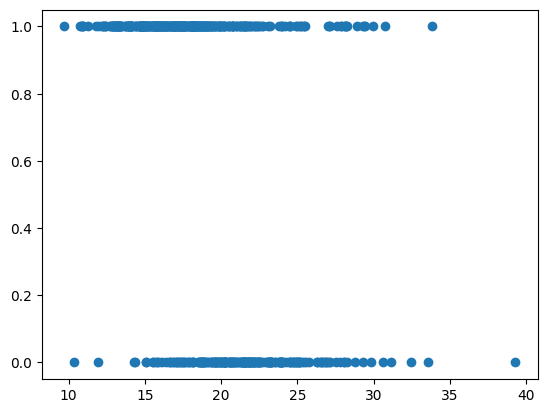

In [4]:
plt.scatter(features[:,1],labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=50, train_size=0.80,stratify=labels)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, random_state=20, train_size=0.80,stratify=y_train)

In [8]:
# model = LogisticRegression(solver='lbfgs', max_iter=100_000)
# model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)
result = {'score':[], 'depth':[], 'split':[], 'leaf':[]}
model = RandomForestClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)


model.fit(X_train_val, y_train_val)
y_predict_val = model.predict(X_val)
y_predict_test = model.predict(X_test)
print('model prediction for val data: {0:.2f}'.format(model.score(X_val,y_val)))
print('model prediction for train data: {0:.2f}'.format(model.score(X_train,y_train)))
print('model prediction for test data: {0:.2f}'.format(model.score(X_test,y_test)))

score = np.round(model.score(X_test,y_test),2)

result['score'].append(score)
result['depth'].append(10)
result['split'].append(10)
result['leaf'].append(5)

print('confusions matrix val set:')
print(confusion_matrix(y_val,y_predict_val)/len(y_predict_val))
print(f'\n\n report: {classification_report(y_test,y_predict_test)}')

result = pd.DataFrame(result)

if False:
    plt.figure(figsize=[10, 10])
    plot_tree(model)

model prediction for val data: 0.93
model prediction for train data: 0.97
model prediction for test data: 0.96
confusions matrix val set:
[[0.31868132 0.05494505]
 [0.01098901 0.61538462]]


 report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

